# 导入工具包

In [1]:
# mediapipe人工智能工具包
import mediapipe as mp
# opencv-python
import cv2
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 导入模型

In [2]:
# 导入solution
mp_pose = mp.solutions.pose
# 导入绘图函数
mp_drawing = mp.solutions.drawing_utils
# 导入模型
pose = mp_pose.Pose(static_image_mode=True,  # 是静态图片还是连续视频帧
                    model_complexity=2,  # 选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                    smooth_landmarks=True,  # 是否平滑关键点
                    enable_segmentation=True,  # 是否人体抠图
                    min_detection_confidence=0.5,  # 置信度阈值
                    min_tracking_confidence=0.5)  # 追踪阈值

# 定义可视化图像函数

In [3]:
# BGR(cv2) -> RGB(plt)
def show_image(img):
    # opencv读入图像格式为BGR，matplotlib可视化格式为RGB
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 读入图像

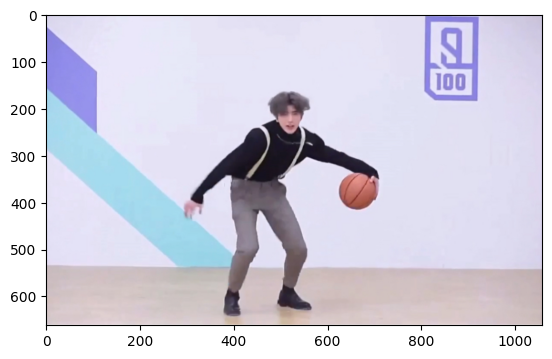

In [4]:
img = cv2.imread('example/KunBasketball.png')
show_image(img)

# 将图像输入模型，获取预测结果

In [5]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = pose.process(img)

# 可视化检测结果

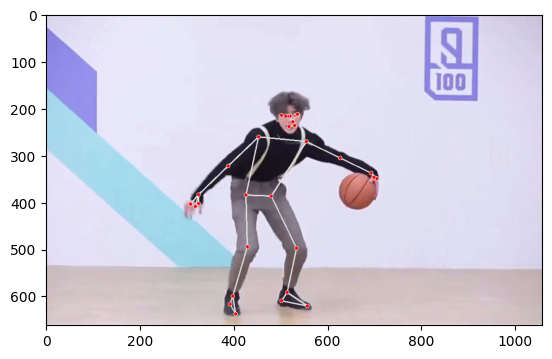

In [6]:
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
show_image(img)

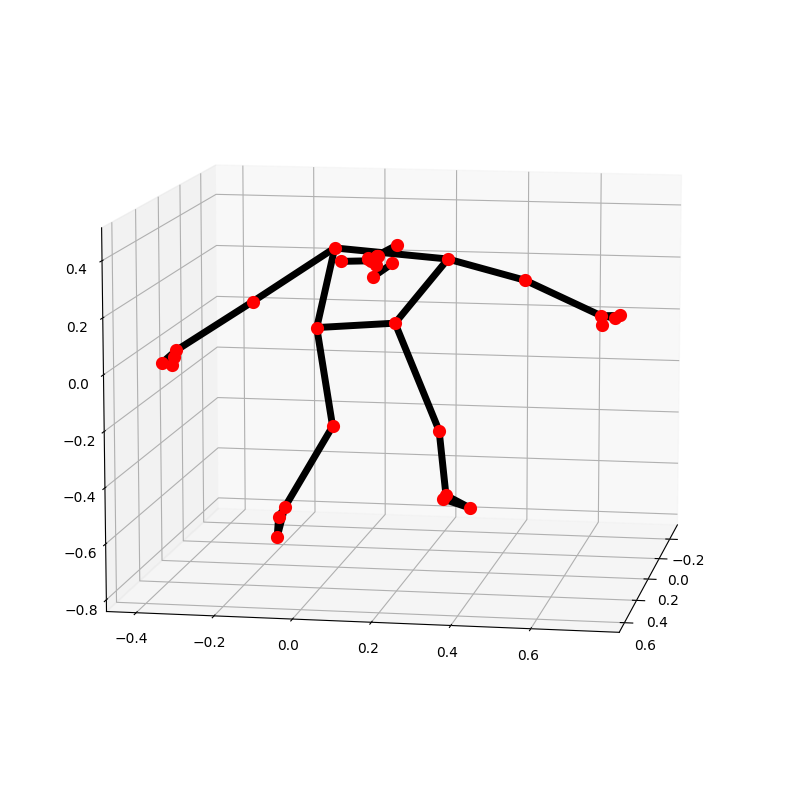

In [7]:
# 在三维真实物理坐标系中可视化以米为单位的检测结果
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)